In [9]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.evaluate import plot_decision_regionsf
%matplotlib inline

# SVM - IRIS dataset

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

In [5]:
# If you haven't installed mlxtend yet for ipython
# !conda install -c rasbt mlxtend -qy

Fetching package metadata ...........
Solving package specifications: ..........

Package plan for installation in environment /opt/conda:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    jpeg-8d                    |                2         806 KB
    qt-4.8.7                   |                3        34.1 MB
    pyqt-4.11.4                |           py35_2         3.5 MB  conda-forge
    mlxtend-0.4.2              |           py35_0         1.2 MB  rasbt
    ------------------------------------------------------------
                                           Total:        39.6 MB

The following NEW packages will be INSTALLED:

    mlxtend: 0.4.2-py35_0  rasbt      
    pyqt:    4.11.4-py35_2 conda-forge
    qt:      4.8.7-3                  

The following packages will be UPDATED:

    jpeg:    8d-1                      --> 8d-2



## Example of Hard Margin SVM

In [34]:
hard_svm = SVC(kernel='linear')
hard_svm.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Rendering from [this](http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html)

Support Vectors: [[ 4.8  1.9]
 [ 5.1  1.9]
 [ 4.9  3.3]
 [ 5.1  3. ]]


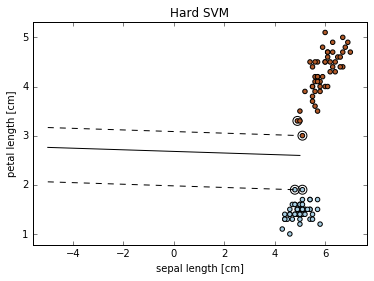

In [35]:
w = hard_svm.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (hard_svm.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = hard_svm.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = hard_svm.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(hard_svm.support_vectors_[:, 0], hard_svm.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
print('Support Vectors: %s' % hard_svm.support_vectors_)

plt.title('Hard SVM')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.axis('tight')
plt.show()

## Jin's Rendering

Support Vectors: [[ 4.8  1.9]
 [ 5.1  1.9]
 [ 4.9  3.3]
 [ 5.1  3. ]]


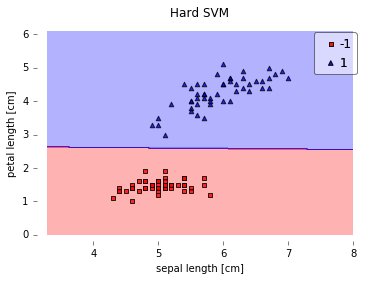

In [37]:
print('Support Vectors: %s' % hard_svm.support_vectors_)
plot_decision_regions(X, y, clf=hard_svm)
plt.title('Hard SVM')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.axis('tight')
plt.show()

# # plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
# plt.xlabel('Iterations')
# plt.ylabel('Missclassifications')
# plt.show()